In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)

from IPython.display import display, HTML

In [298]:
countries = pd.read_csv('country-data.csv')
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [299]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Since there are no missing values in the dataset, we will not need to do missing value analysis and imputation of any kind.

## EDA- Univariate and Bivariate analysis

In [300]:
# converting the columns exports, health and imports from percentage to values

countries['Exports'] = ((countries['exports']*countries['gdpp'])/100)
countries['Health'] = ((countries['health']*countries['gdpp'])/100)
countries['Imports'] = ((countries['imports']*countries['gdpp'])/100)

countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports,Health,Imports
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


In [301]:
# Dropping the three columns exports, health and imports from the dataset since they have been converted to actual values
# Renaming the three newly created columns

countries.drop(['exports','health','imports'], axis='columns', inplace=True)

countries.columns = ['country','child_mort','income','inflation','life_expec','total_fer','gdpp','exports','health','imports']

countries.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


In [302]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   income      167 non-null    int64  
 3   inflation   167 non-null    float64
 4   life_expec  167 non-null    float64
 5   total_fer   167 non-null    float64
 6   gdpp        167 non-null    int64  
 7   exports     167 non-null    float64
 8   health      167 non-null    float64
 9   imports     167 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


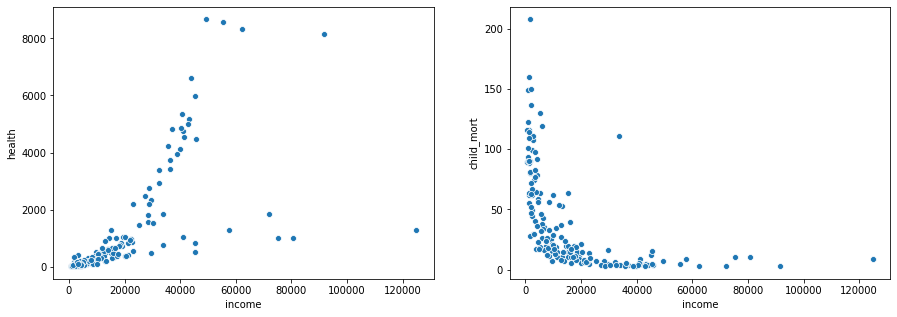

In [303]:
# Analysing the health and child_mort against income per person

f,ax= plt.subplots(1,2, figsize=(15, 5))
sns.scatterplot(x='income',y='health', data=countries, ax=ax[0])
sns.scatterplot(x='income',y='child_mort', data=countries, ax=ax[1])
plt.show()

Here we can clearly see high correlation between the income and health variables. Countries with high income have high sepnding on health, and vice versa. There is also a high negative correlation between income and child_mort- countries with low income have high child mortality rates.

This is because countries with higher incomes have better infrastructure, and also people’s flexibility is also increased by additional money.

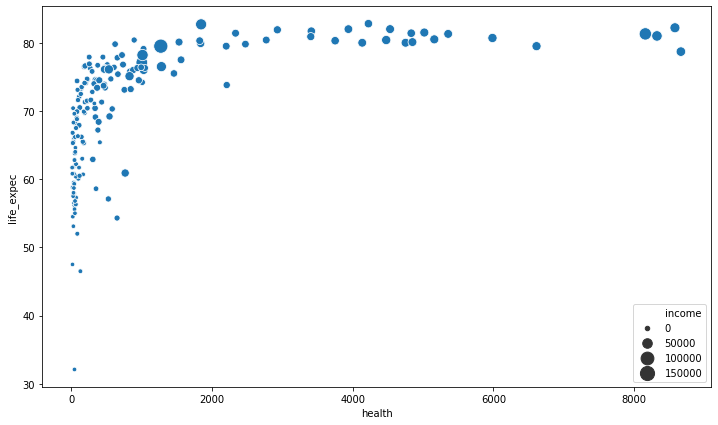

In [304]:
# Plotting health vs. life_expec, also factoring in income

plt.figure(figsize=(12,7))
sns.scatterplot(x='health', y='life_expec',size='income', sizes=(20, 200), data=countries)
plt.show()

There is a high correlation between health and life expectancy. Countries with high health spending have higher life expectancy, but it reaches a pleatue somewhere about 10000$. Spending more than this amount also results in the same life expectancy. Also, we see that where the spending on health and life expectancy are higher, even the per person income is higher. For countries with low per person income, the life expectancy and health spending are low.

Let's check which are the countries on the two ends of the spectrum in the above graph:

In [305]:
print('The 5 countries on the low end of the spectrum with least life expectancy and least health spending are:')
display(countries[['country','child_mort','life_expec','health','income']].sort_values(by=['life_expec','health']).head(5))
print('\n\n\n The 5 countries on the high end of the spectrum with most health spending and high life expectancy are:')
display(countries[['country','child_mort','life_expec','health','income']].sort_values(by=['health','life_expec'], ascending=False).head(5))

The 5 countries on the low end of the spectrum with least life expectancy and least health spending are:


,country,child_mort,life_expec,health,income
66,Haiti,208.0,32.1,45.7442,1500
87,Lesotho,99.7,46.5,129.8700,2380
31,Central African Republic,149.0,47.5,17.7508,888
166,Zambia,83.1,52.0,85.9940,3280
94,Malawi,90.5,53.1,30.2481,1030





 The 5 countries on the high end of the spectrum with most health spending and high life expectancy are:


,country,child_mort,life_expec,health,income
159,United States,7.3,78.7,8663.60,49400
145,Switzerland,4.5,82.2,8579.00,55500
114,Norway,3.2,81.0,8323.44,62300
91,Luxembourg,2.8,81.3,8158.50,91700
44,Denmark,4.1,79.5,6612.00,44000


We can see that in the countries with least life expectancy, even the child mortality rates are very high, which is probably why the life expectancy rates of these countries are low. In the countries with max health spending and max life expectancy, the child mortality rates are also very low.

In [306]:
# Converting total_fert column to integer values

countriesCopy = countries.copy()
countriesCopy['total_fer'] = countriesCopy['total_fer'].round(0).astype('int')
countriesCopy.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
0,Afghanistan,90.2,1610,9.44,56.2,6,553,55.30,41.9174,248.297
1,Albania,16.6,9930,4.49,76.3,2,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,12900,16.10,76.5,3,4460,1712.64,185.9820,1400.440
3,Angola,119.0,5900,22.40,60.1,6,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2,12200,5551.00,735.6600,7185.800


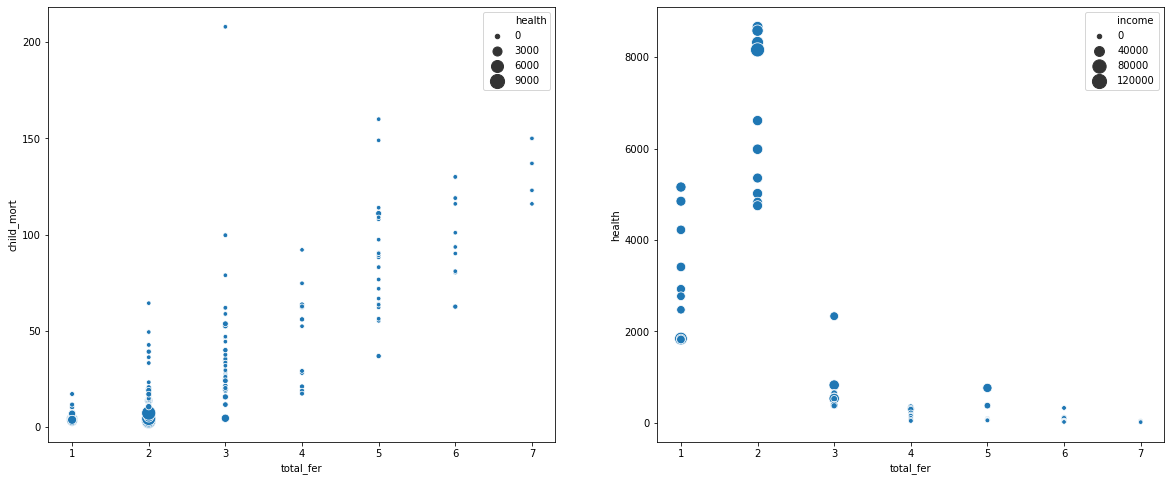

In [307]:
# Plotting child_mortality with total_fer, health and income

f,ax = plt.subplots(1,2,figsize=(20,8))
sns.scatterplot(x='total_fer',y='child_mort',size='health',sizes=(20, 200), data=countriesCopy, ax=ax[0])


groupby1 = countriesCopy.groupby(['total_fer'])
groupby2 = groupby1.apply(lambda x: x.sort_values(['health'],ascending=False).head(10))

sns.scatterplot(x='total_fer',y='health',size='income', sizes=(20, 200), data=groupby2, ax=ax[1])
plt.show()

Countries with high per person incomes mostly have fertility rate as 1 or 2, in some cases 3 as well. These also have the lowest child mortality rates. As the per person income decreses, the fertility rate increases and so does the child mortality. 

From the below plot, we also see that the health expenditure and income are generally decreasing as the fertility rate increases after 3.

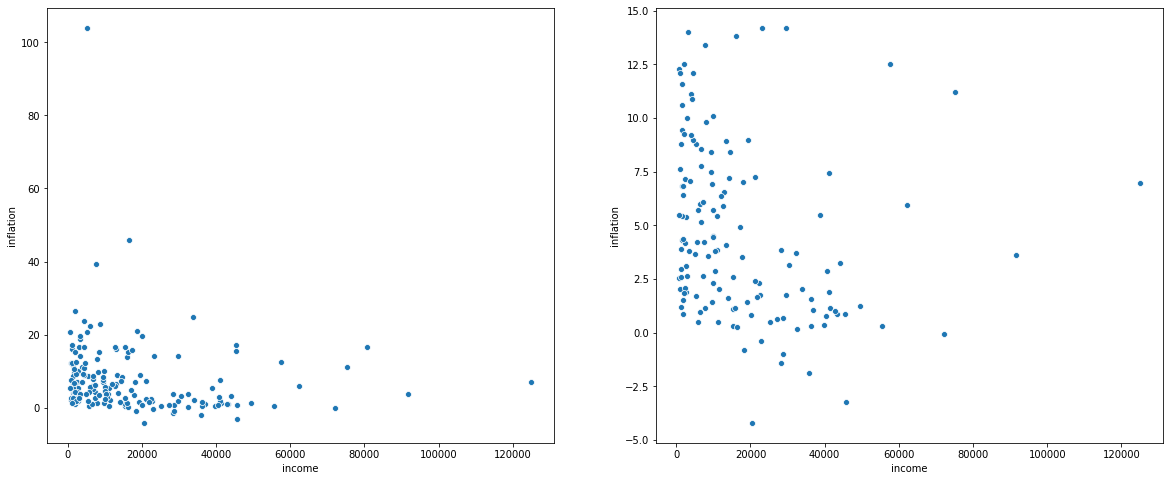

In [308]:
# Plotting inflation with income

Zoomed_in1 = countries[countries['inflation']<=15]

f,ax = plt.subplots(1,2,figsize=(20,8))
sns.scatterplot(x='income', y='inflation', data=countries, ax=ax[0])
sns.scatterplot(x='income', y='inflation', data=Zoomed_in1, ax=ax[1])
plt.show()

In [309]:
print('Countries with highest inflation are:')
display(countries.sort_values(by='inflation', ascending=False).head())

Countries with highest inflation are:


,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
113,Nigeria,130.0,5150,104.0,60.5,5.84,2330,589.49,118.131,405.42
163,Venezuela,17.1,16500,45.9,75.4,2.47,13500,3847.50,662.850,2376.00
103,Mongolia,26.1,7710,39.2,66.2,2.64,2650,1237.55,144.160,1502.55
149,Timor-Leste,62.6,1850,26.5,71.1,6.23,3600,79.20,328.320,1000.80
49,Equatorial Guinea,111.0,33700,24.9,60.9,5.21,17100,14671.80,766.080,10071.90


We can see mostly the countries with high inflation are the ones with low income per person. But nothing can be claerly said from this graph.

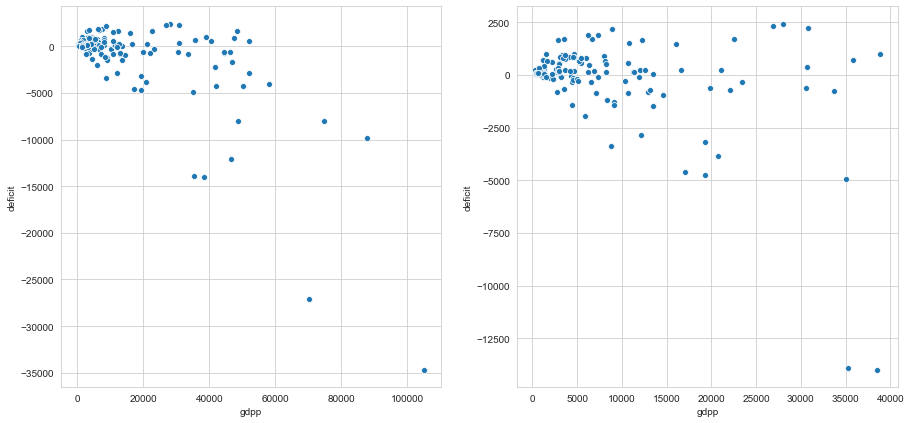

5 countries with lowest trade deficit are: 


,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,deficit
91,Luxembourg,2.8,91700,3.620,81.3,2,105000,183750.0,8158.50,149100.0,-34650.0
123,Qatar,9.0,125000,6.980,79.5,2,70300,43796.9,1272.43,16731.4,-27065.5
82,Kuwait,10.8,75200,11.200,78.2,2,38500,25679.5,1012.55,11704.0,-13975.5
23,Brunei,10.5,80600,16.700,77.1,2,35300,23792.2,1002.52,9884.0,-13908.2
133,Singapore,2.8,72100,-0.046,82.7,1,46600,93200.0,1845.36,81084.0,-12116.0




5 countries with highest trade deficit are: 


,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,deficit
10,Bahamas,13.8,22900,-0.393,73.8,2,28000,9800.00,2209.200,12236.00,2436.00
60,Greece,3.9,28700,0.673,80.4,1,26900,5944.90,2770.700,8258.30,2313.40
42,Cyprus,3.6,33900,2.010,79.9,1,30800,15461.60,1838.760,17710.00,2248.40
86,Lebanon,10.3,16300,0.238,79.8,2,8860,3171.88,622.858,5333.72,2161.84
141,St. Vincent and the Grenadines,20.7,9920,4.440,71.6,2,6230,1675.87,278.481,3557.33,1881.46


In [310]:
# Plotting deficit

countriesCopy['deficit'] = countries['imports']-countries['exports']
countriesCopyZoomedIn = countriesCopy[countriesCopy['gdpp']<=40000]

with sns.axes_style('whitegrid'):
    f,ax=plt.subplots(1,2, figsize=(15,7))
    sns.scatterplot(x='gdpp', y='deficit', data=countriesCopy, ax=ax[0])
    sns.scatterplot(x='gdpp', y='deficit', data=countriesCopyZoomedIn, ax=ax[1])
    plt.show()

print('5 countries with lowest trade deficit are: ')
display(countriesCopy.sort_values(by=['deficit']).head(5))

print('\n\n5 countries with highest trade deficit are: ')
display(countriesCopy.sort_values(by=['deficit'], ascending=False).head(5))

There is one country with an extremely low deficit, which comes out later from the dataframe to be Luxembourg. For most of the countries the trade deficit is in negative. The 5 countries having very low trade deficit and 5 countries having the highest trade deficit are shown in the dataframes respectively.

In [311]:
countries.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


#### So now, most of our variables seem to be related to two variables,  gdpp and income. Apart from this, we will also be using child_mort for our clustering.

## Outlier analysis and removal

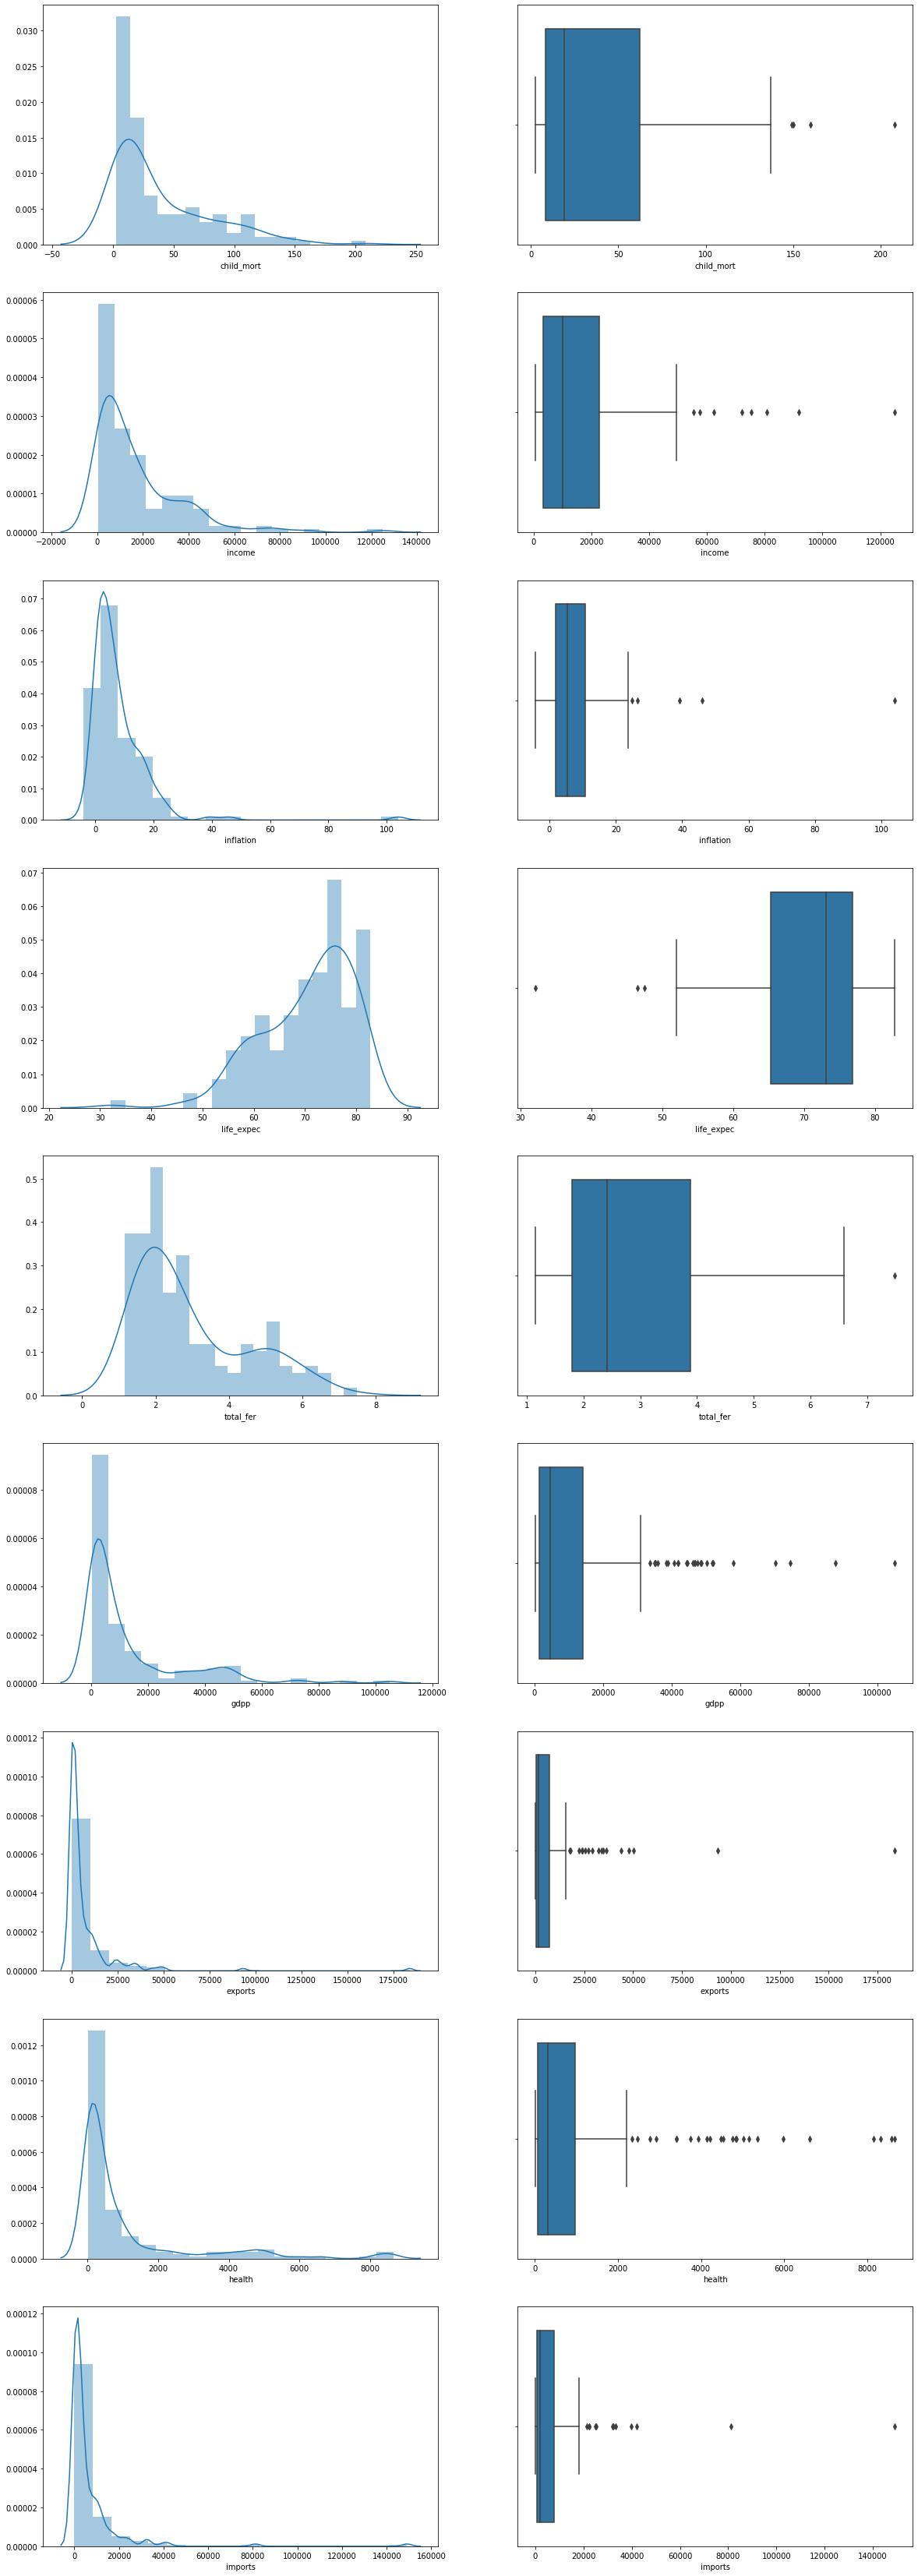

In [312]:
col_list = ['child_mort','income','inflation','life_expec','total_fer','gdpp','exports','health','imports']

f, axes=plt.subplots(9, 2, figsize=(20,60))
for i in range(0,9):
    column = col_list[i]
#   print(i, j, column, type(column))
    sns.distplot(countries[column],bins=18, ax=axes[i,0])
    sns.boxplot(countries[column], ax=axes[i,1])
plt.show()

1. Child Mortality- We can see that child mortality has one clear spike a little after 0, which are the countries with least child mortality. Most of the surveyed countries have low child mortality from the histogram. From the boxplot, we can see that there are few coutries being projected as outliers because they have a high child mortality.

2. Income- Per person income of most of the surveyed countries is also quite low, with the histogram slightly tapering off as the income increases. From the boxplot, we observe that there are a few countries where the per person income is very high, which are shown as outliers.

3. Inflation- negative or low for most of the surveyed countries, with few countries as exceptionally high inflations as seen from the box plot.

4. Life expectancy- No clear spikes seen in the histogram. Only thing that can be deduced is that there is one country with very low life expectancy, a claer outlier on both the histogram and boxplot. All other countries seem to be quite well grouped in terms of life expectancy.

5. total fertility- again, most countries have either 1 or 2, with very few countries having a value above 6.

6. GDP- Most of the surveyed countries have a low gdp, there is a clear second softer spike at about 45000, which indicates that there can be two groups- countries with low gdp and those with high gdp.

7. exports- most surveyed countries have low exports, very few countries going beyond the value of 20000. There is one country with very high exports which is skewing our boxplot.

8. Health- Health spend is low in most surveyed countries. What we can also infer from this is that countries with low health spend have generally healthier populations than those with high health spends.

9. imports- most countries have low imports, onw country with very high imports the outlier.

Here we can't drop outliers, since data is less. Also, since the countries falling on lower range of income, gdpp, health, exports imports etc are those of countries in mose dire need of aid, hence we will not remove countries in the lower range on these variables.

Low child mortality is a sign of developed country, and vice versa. Thus, even here, we will not treat the outliers on the higher ranges, we will treat outliers only in the lower range.

In [313]:
income_q1 = countries['income'].quantile(0.01)
income_q4 = countries['income'].quantile(0.97)

incomeOutliers = countries[countries['income']>=income_q4]
incomeOutliers

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
23,Brunei,10.5,80600,16.700,77.1,1.84,35300,23792.2,1002.52,9884.0
82,Kuwait,10.8,75200,11.200,78.2,2.21,38500,25679.5,1012.55,11704.0
91,Luxembourg,2.8,91700,3.620,81.3,1.63,105000,183750.0,8158.50,149100.0
123,Qatar,9.0,125000,6.980,79.5,2.07,70300,43796.9,1272.43,16731.4
133,Singapore,2.8,72100,-0.046,82.7,1.15,46600,93200.0,1845.36,81084.0


In [314]:
health_q1 = countries['health'].quantile(0.01)
health_q4 = countries['health'].quantile(0.97)

healthOutliers = countries[countries['health']>=health_q4]
healthOutliers

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
44,Denmark,4.1,44000,3.220,79.5,1.87,58000,29290.0,6612.00,25288.0
91,Luxembourg,2.8,91700,3.620,81.3,1.63,105000,183750.0,8158.50,149100.0
114,Norway,3.2,62300,5.950,81.0,1.95,87800,34856.6,8323.44,25023.0
145,Switzerland,4.5,55500,0.317,82.2,1.52,74600,47744.0,8579.00,39761.8
159,United States,7.3,49400,1.220,78.7,1.93,48400,6001.6,8663.60,7647.2


In [315]:
gdp_q1 = countries['gdpp'].quantile(0.01)
gdp_q4 = countries['gdpp'].quantile(0.97)

gdpOutliers = countries[countries['gdpp']>=gdp_q4]
gdpOutliers

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
44,Denmark,4.1,44000,3.220,79.5,1.87,58000,29290.0,6612.00,25288.0
91,Luxembourg,2.8,91700,3.620,81.3,1.63,105000,183750.0,8158.50,149100.0
114,Norway,3.2,62300,5.950,81.0,1.95,87800,34856.6,8323.44,25023.0
123,Qatar,9.0,125000,6.980,79.5,2.07,70300,43796.9,1272.43,16731.4
145,Switzerland,4.5,55500,0.317,82.2,1.52,74600,47744.0,8579.00,39761.8


We can see some countries repeated in the above lists, so I will drop those countries, since they are well off and not in need of aid.

Countries being dropped - Luxembourg, Qatar, Denmark, Norway, Switzerland, United States.

In [316]:
countries.drop([91, 123, 44, 114, 145, 159], axis='rows', inplace=True)
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     161 non-null    object 
 1   child_mort  161 non-null    float64
 2   income      161 non-null    int64  
 3   inflation   161 non-null    float64
 4   life_expec  161 non-null    float64
 5   total_fer   161 non-null    float64
 6   gdpp        161 non-null    int64  
 7   exports     161 non-null    float64
 8   health      161 non-null    float64
 9   imports     161 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.8+ KB


## Scaling

In [317]:
from sklearn.preprocessing import StandardScaler
# mean is 0 and std dev is 1

In [318]:
# Instantiating the scaler

scaler = StandardScaler()

In [319]:
# fit-transform
countries_scaled = scaler.fit_transform(countries.drop('country', axis='columns'))
print(countries_scaled.shape, type(countries_scaled))

(161, 9) <class 'numpy.ndarray'>


In [320]:
# Converting the rfm_df_scaled to a dataframe whereas currently it is a numpy array

countries_scaled = pd.DataFrame(countries_scaled)
type(countries_scaled)

countries_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.254005,-0.873194,0.140344,-1.586419,1.860966,-0.736523,-0.522850,-0.600885,-0.542260
1,-0.566561,-0.335679,-0.322637,0.692843,-0.880863,-0.479508,-0.419170,-0.430247,-0.351655
2,-0.301886,-0.143802,0.763264,0.715523,-0.065547,-0.452622,-0.365191,-0.492100,-0.416011
3,1.966401,-0.596038,1.352513,-1.144174,2.084520,-0.520200,-0.318906,-0.556570,-0.403526
4,-0.722397,0.256750,-0.607908,0.749541,-0.565257,0.109803,-0.000055,-0.077032,0.217938


## Clustering - KMeans Clustering

### Checking Hopkins score

In [321]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) #columns
    n=len(X) #rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []
    for j in range(0,m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X, axis=0), np.amax(X, axis=0), d).reshape(1,-1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
        H = sum(ujd) / (sum(ujd) + sum(wjd))
        if isnan(H):
            print(ujd, wjd)
            H = 0
        
        return H

In [322]:
hopkins(countries_scaled)

0.9569346761776515

Since the value of Hopkins test is higher than 80% (almost around 96%), it means that our data has very good cluster tendency, hence we can go ahead with the clustering.

If Hopkins score is lower than 60%, it indicates that data does not have clustering tendency, so we should not use clustering algorithm in that case.

### Choosing a value for K

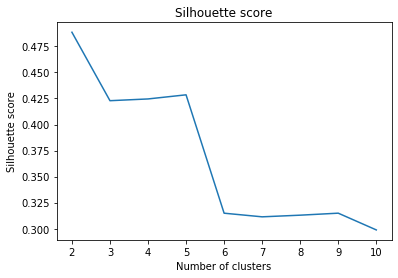

In [323]:
# Silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores=[]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(countries_scaled)
    cluster_labels = kmeans.labels_
    

    #Silhoutte score
    silhouette_avg = silhouette_score(countries_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
#     print('For n clusters={0}, the silhoutte score is {1}'.format(i, silhouette_avg))

#Plot SSD

plt.title('Silhouette score')
sns.lineplot(y=silhouette_scores, x=range_n_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

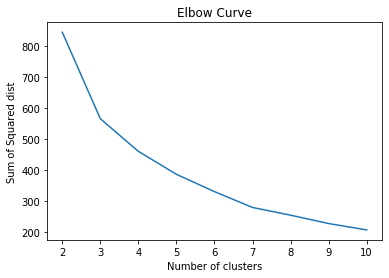

In [324]:
# Elbow curve

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
ssd=[]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i, max_iter = 100)
    kmeans.fit(countries_scaled)
    ssd.append(kmeans.inertia_)

# print(ssd)

#Plot SSD

plt.title('Elbow Curve')
sns.lineplot(y=ssd, x=range_n_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared dist')
plt.show()

Since both silhouette score and elbow curve are suggesting 3 as the best number of clusters to go with, we will take the value of k as 3.

### Model with 3 clusters

In [325]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=99)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [326]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2,
       0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 0])

In [327]:
# Assiging the labels to each customer ID

countries_clustering = countries.copy()
countries_clustering['KmeansID'] = kmeans.labels_
countries_clustering.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,KmeansID
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297,0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740,1
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440,1
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370,0
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800,1


In [328]:
countries_clustering['KmeansID'].value_counts()

1    83
0    48
2    30
Name: KmeansID, dtype: int64

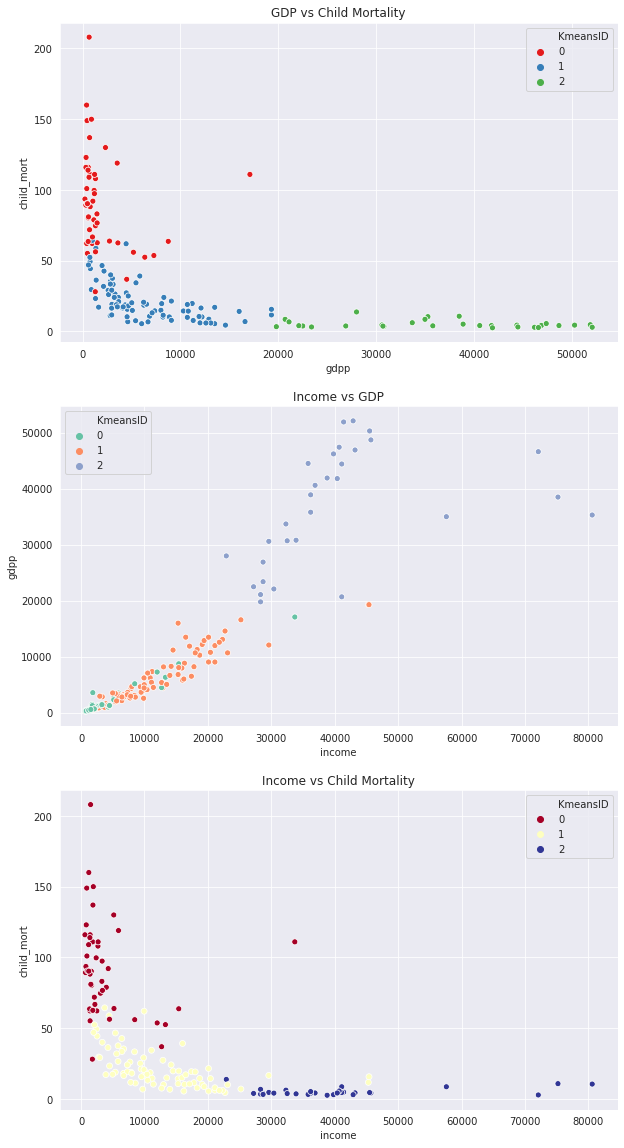

In [329]:
# Plotting the cluster using the three variables - gdpp, child_mort and income

with sns.axes_style('darkgrid'):
    f,ax = plt.subplots(3,1, figsize=(10,20))
    
    plt1 = sns.scatterplot(x='gdpp', y='child_mort', hue='KmeansID', data=countries_clustering, palette = 'Set1', ax=ax[0])
    plt1.set_title('GDP vs Child Mortality')
    
    plt2 = sns.scatterplot(x='income', y='gdpp', hue='KmeansID', data=countries_clustering, palette = 'Set2', ax=ax[1])
    plt2.set_title('Income vs GDP')
    
    plt3 = sns.scatterplot(x='income', y='child_mort', hue='KmeansID', data=countries_clustering, palette = 'RdYlBu', ax=ax[2])
    plt3.set_title('Income vs Child Mortality')
plt.show()

### Cluster Profiling

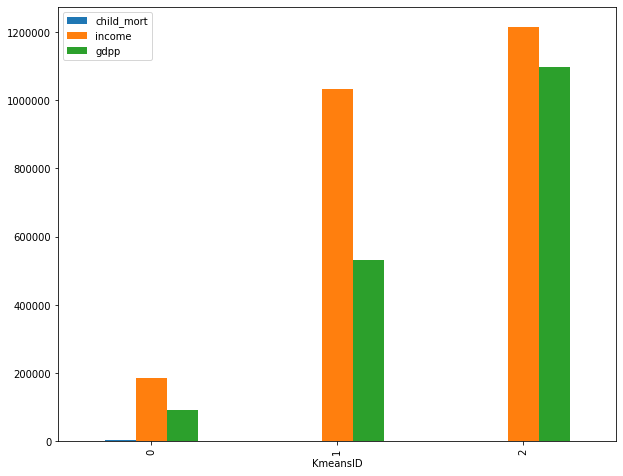

,child_mort,income,gdpp
KmeansID,,,
0,4397.3,187073,91642
1,1807.0,1034190,532172
2,155.9,1214000,1097100


In [330]:
# plt.figure(figsize=(10,8))
ss = countries_clustering.drop(['country','inflation','life_expec','total_fer','exports','health','imports'], 
                               axis='columns').groupby('KmeansID').sum()
ss.plot(kind = 'bar', figsize=(10,8));
plt.show()

display(ss)

Here the child mortality is getting plotted, but its value is so low, and the values of the other tow variables so high that child mortality bar is not visible on the graph.

Thus, we can see from the graph and the dataframe displayed as well, that the cluster number 0 has countries with lowest income, lowest GDP and highest child mortality. Thus, these are the countries most in need of aid.

Now I will further drill down into the cluster number 0 and try to identify countries within the cluster most in need of aid.

In [331]:
print('Countries with highest child mortality rates, lowest gdp and income per person: ')
display(countries_clustering[countries_clustering['KmeansID'] == 0].sort_values(by=['child_mort','gdpp','income'], ascending=[False,True, True]).head(5))

Countries with highest child mortality rates, lowest gdp and income per person: 


,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,KmeansID
66,Haiti,208.0,1500,5.45,32.1,3.33,662,101.286,45.7442,428.314,0
132,Sierra Leone,160.0,1220,17.20,55.0,5.20,399,67.032,52.2690,137.655,0
32,Chad,150.0,1930,6.39,56.5,6.59,897,330.096,40.6341,390.195,0
31,Central African Republic,149.0,888,2.01,47.5,5.21,446,52.628,17.7508,118.190,0
97,Mali,137.0,1870,4.37,59.5,6.55,708,161.424,35.2584,248.508,0


In [332]:
print('Countries with lowest gdp, highest child mortality rates and income per person: ')
display(countries_clustering[countries_clustering['KmeansID'] == 0].sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True]).head(5))

Countries with lowest gdp, highest child mortality rates and income per person: 


,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,KmeansID
26,Burundi,93.6,764,12.30,57.7,6.26,231,20.6052,26.7960,90.552,0
88,Liberia,89.3,700,5.47,60.8,5.02,327,62.4570,38.5860,302.802,0
37,"Congo, Dem. Rep.",116.0,609,20.80,57.5,6.54,334,137.2740,26.4194,165.664,0
112,Niger,123.0,814,2.55,58.8,7.49,348,77.2560,17.9568,170.868,0
132,Sierra Leone,160.0,1220,17.20,55.0,5.20,399,67.0320,52.2690,137.655,0


The 5 countries most in need of aid according to K-mean clustering are:

1. Haiti
2. Burundi
3. Seirra Leone
4. Liberia
5. Chad

## Clustering - Hierarchical Clustering

In [333]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [334]:
countries_clustering.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,KmeansID
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297,0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740,1
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440,1
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370,0
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800,1


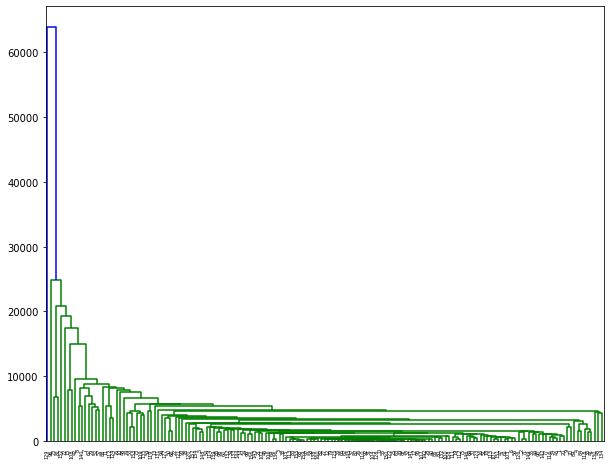

In [335]:
# Single linkage

plt.figure(figsize=(10,8))
mergings_single = linkage(y=countries_clustering.drop('country', axis='columns'), method='single', metric='euclidean')
dendrogram(mergings_single)
plt.show()

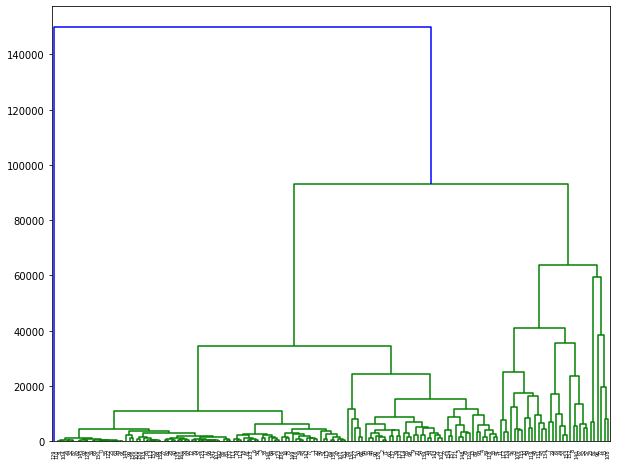

In [336]:
# Complete linkage

plt.figure(figsize=(10,8))
mergings_complete = linkage(y=countries_clustering.drop('country', axis='columns'), method='complete', metric='euclidean')
dendrogram(mergings_complete)
plt.show()

Since the clusters are better defined in the plot of complete linkage, I will cut the complete linkage plot at k=3, to get 3 clusters, and then plot the variables and see if it gives good results.

In [337]:
# Cutting off the above plot at 3

hierarchical = cut_tree(mergings_complete, n_clusters = 3)

In [338]:
# Reshaping the above numpy array

hie_clusters = hierarchical.reshape(-1, )
hie_clusters

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0])

In [339]:
# Assigning the above hie_clusters to a new variable in our dataframe called hierarchicalID

countries_clustering['hierarchicalID'] = hie_clusters
countries_clustering.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,KmeansID,hierarchicalID
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297,0,0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740,1,0
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440,1,0
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370,0,0
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800,1,0


In [340]:
countries_clustering['hierarchicalID'].unique()

array([0, 1, 2])

Our hierarchialID has three unique values of 0, 1 and 2, since we divided it into three clusters.

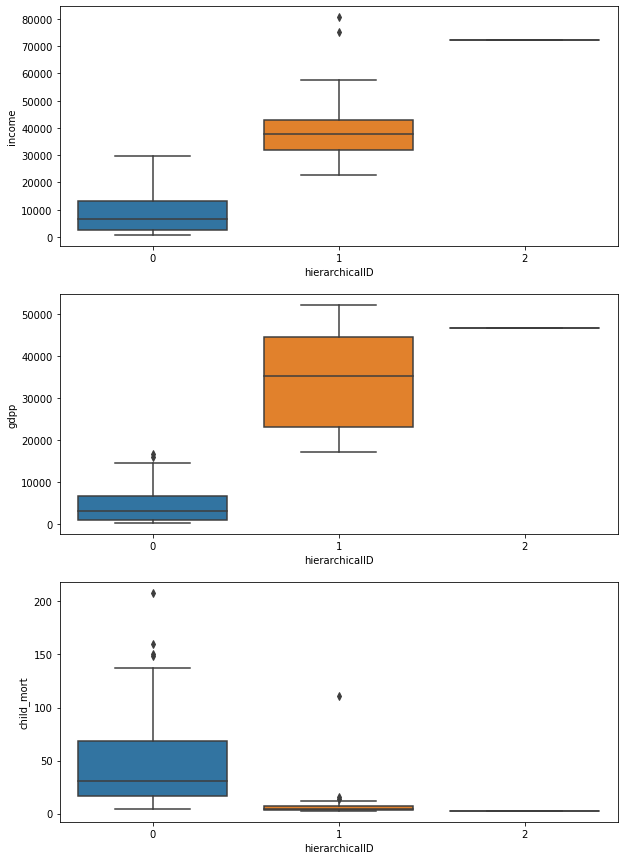

In [341]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.boxplot(x='hierarchicalID', y='income', data=countries_clustering)

plt.subplot(3,1,2)
sns.boxplot(x='hierarchicalID', y='gdpp', data=countries_clustering)

plt.subplot(3,1,3)
sns.boxplot(x='hierarchicalID', y='child_mort', data=countries_clustering)

From the above graphs, we can see that even hierarchical clustering has cleanly divided the total data into 3 clusters. The cluster 0 has countries with the highest child mortality rates, the lowest income per person values and lowest GDPs. Thus, countries most urgently in need of aid will be found in this cluster.

In [342]:
print('Countries with highest child mortality rates, lowest gdp and income per person: ')
display(countries_clustering[countries_clustering['hierarchicalID'] == 0].sort_values(by=['child_mort','gdpp','income'], ascending=[False,True, True]).head(5))

Countries with highest child mortality rates, lowest gdp and income per person: 


,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,KmeansID,hierarchicalID
66,Haiti,208.0,1500,5.45,32.1,3.33,662,101.286,45.7442,428.314,0,0
132,Sierra Leone,160.0,1220,17.20,55.0,5.20,399,67.032,52.2690,137.655,0,0
32,Chad,150.0,1930,6.39,56.5,6.59,897,330.096,40.6341,390.195,0,0
31,Central African Republic,149.0,888,2.01,47.5,5.21,446,52.628,17.7508,118.190,0,0
97,Mali,137.0,1870,4.37,59.5,6.55,708,161.424,35.2584,248.508,0,0


In [343]:
print('Countries with lowest gdp, highest child mortality rates and income per person: ')
display(countries_clustering[countries_clustering['hierarchicalID'] == 0].sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True]).head(5))

Countries with lowest gdp, highest child mortality rates and income per person: 


,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,KmeansID,hierarchicalID
26,Burundi,93.6,764,12.30,57.7,6.26,231,20.6052,26.7960,90.552,0,0
88,Liberia,89.3,700,5.47,60.8,5.02,327,62.4570,38.5860,302.802,0,0
37,"Congo, Dem. Rep.",116.0,609,20.80,57.5,6.54,334,137.2740,26.4194,165.664,0,0
112,Niger,123.0,814,2.55,58.8,7.49,348,77.2560,17.9568,170.868,0,0
132,Sierra Leone,160.0,1220,17.20,55.0,5.20,399,67.0320,52.2690,137.655,0,0


The 5 countries most in need of aid according to K-mean clustering are:

1. Haiti
2. Burundi
3. Seirra Leone
4. Liberia
5. Chad